In [1]:
#Importing Necessary libraries for loading and plotting data
import pandas as pd   #pandas help in loading the csv and other format into a dataframe
import matplotlib.pyplot as plt #matplotlib is used for plotting the visualisation
import seaborn as sns #seaborn is another visualization library
import numpy as np  #Numpy is used for mathematical operations
from scipy.stats import skew, kurtosis #These functions from scip are used to calculate skewness and kurtosis 


In [2]:
#Loading the data into a dataframe by reading the csv file
data = pd.read_csv('jobs_in_data.csv')
data.head(10) #shows top 10 data entry in the csv file

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M
6,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Senior,Full-time,Remote,United States,M
7,2023,Machine Learning Researcher,Machine Learning and AI,USD,224400,224400,United States,Mid-level,Full-time,In-person,United States,M
8,2023,Machine Learning Researcher,Machine Learning and AI,USD,138700,138700,United States,Mid-level,Full-time,In-person,United States,M
9,2023,Data Engineer,Data Engineering,USD,210000,210000,United States,Executive,Full-time,Remote,United States,M


In [20]:
data.describe() #Generates descriptive statistics summarizing the dataset's distribution & its characteristics.

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
data.shape

(9355, 12)

In [5]:
def calculate_skewness_kurtosis(data, column_name):
    """
    Calculates and prints the skewness and kurtosis for a specified column in the given DataFrame.

    Parameters:
    - data: DataFrame containing the data.
    - column_name: String, the name of the column for which skewness and kurtosis are to be calculated.

    Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean. 
    Positive skewness indicates a distribution with an asymmetric tail extending toward more positive values.
    
    Kurtosis measures the "tailedness" of the probability distribution. A higher kurtosis indicates a distribution with heavier tails, 
    and a lower kurtosis indicates a distribution with lighter tails.
    """
    skewness = data[column_name].skew()
    kurtosis = data[column_name].kurtosis()

    print(f"Skewness for {column_name}:", skewness)
    print(f"Kurtosis for {column_name}:", kurtosis)


In [6]:
calculate_skewness_kurtosis(data,'salary_in_usd')

Skewness for salary_in_usd: 0.6212912531604922
Kurtosis for salary_in_usd: 0.5672418328471021


In [7]:
def plot_correlation_heatmap(data):
    """
    Generates a correlation heatmap for the numerical features in the given DataFrame.

    Parameters:
    - data: DataFrame containing the data for which the correlation heatmap is to be generated.

    This function computes the correlation matrix using the .corr() method on the DataFrame,
    and then uses seaborn's heatmap function to visualize the correlations between numerical features.
    Annotations in the heatmap display the correlation coefficients, providing insights into
    the strength and direction of the relationships between features.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
    return

C:\Users\USAMA\AppData\Local\Temp\ipykernel_23348\1580987828.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


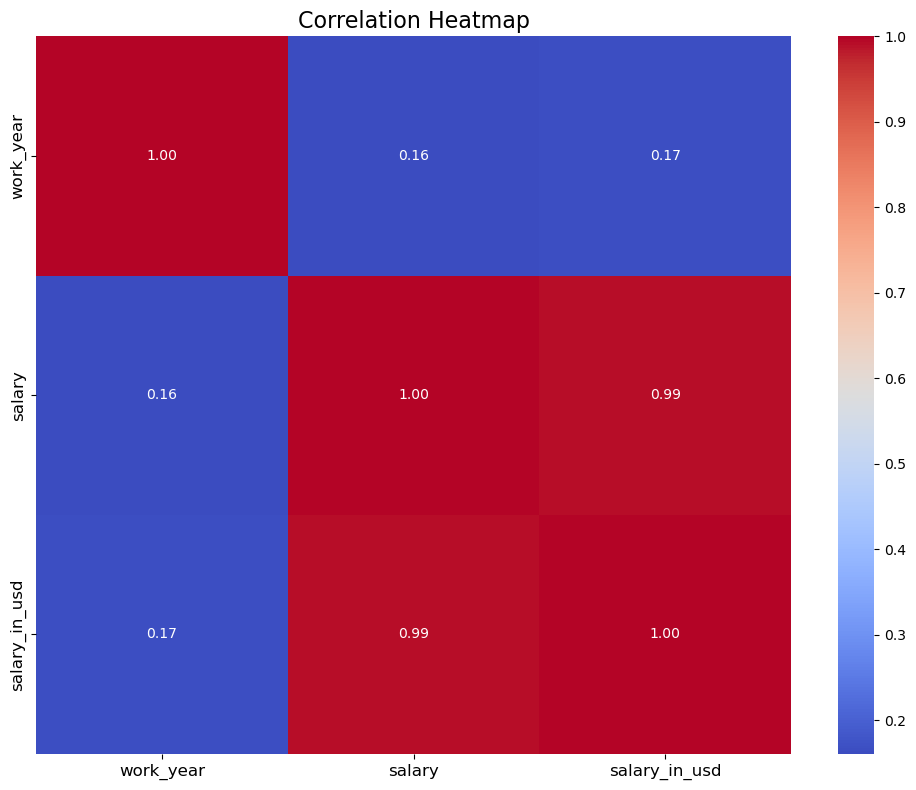

In [8]:
plot_correlation_heatmap(data)

   #                               Relational Graph Function

In [9]:
def plot_experience_salary(data):
    """
    Generates an enhanced scatter plot showing the relationship between experience level and salary in USD.

    Parameters:
    - data: DataFrame containing job data with 'experience_level', 'salary_in_usd', and 'employment_type' columns.

    The function creates a scatter plot with experience levels on the x-axis and salaries in USD on the y-axis.
    Different experience levels are colored differently, and employment types are represented by different markers.
    The legend is placed outside the plot for clarity.
    """
    plt.figure(figsize=(14, 10))
    scatter = sns.scatterplot(data=data, x='experience_level', y='salary_in_usd', hue='experience_level', style='employment_type', s=150, palette='coolwarm', alpha=0.8)
    plt.title('Salary in USD vs. Experience Level', fontsize=18)
    plt.xlabel('Experience Level', fontsize=16)
    plt.ylabel('Salary in USD', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='14')
    plt.tight_layout()
    plt.show()
    return

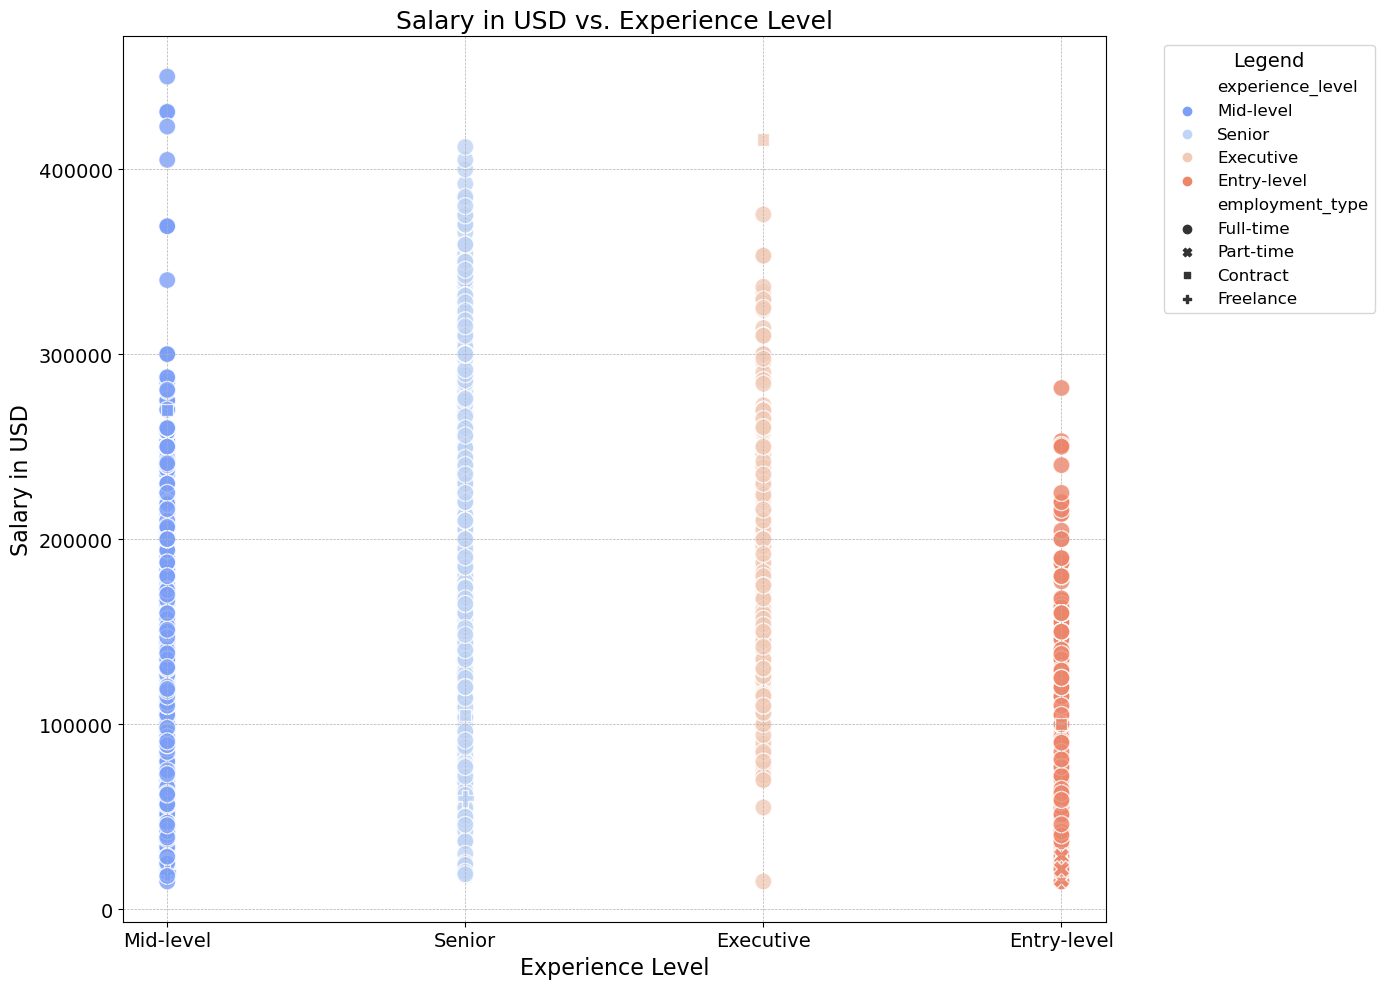

In [10]:
plot_experience_salary(data)

#           Categorical Graph Function

In [11]:
def plot_job_category_distribution(data):
    """
    Generates a count plot showing the distribution of job categories.

    Parameters:
    - data: DataFrame containing job data with 'job_category' column.

    The function creates a vertical count plot with job categories on the y-axis and the count of jobs on the x-axis.
    Each bar represents a different job category, and the bars are ordered by count to highlight the most common categories.
    Enhancements for readability include adjusted figure size, improved font sizes, and a diverse color palette.
    """
    plt.figure(figsize=(14, 10))
    sns.countplot(y='job_category', data=data, order=data['job_category'].value_counts().index, palette='Spectral')
    plt.title('Distribution of Job Categories', fontsize=18)
    plt.xlabel('Number of Jobs', fontsize=16)
    plt.ylabel('Job Category', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(axis='x', linestyle='--', linewidth=0.5, color='gray')
    plt.tight_layout()
    plt.show()
    return

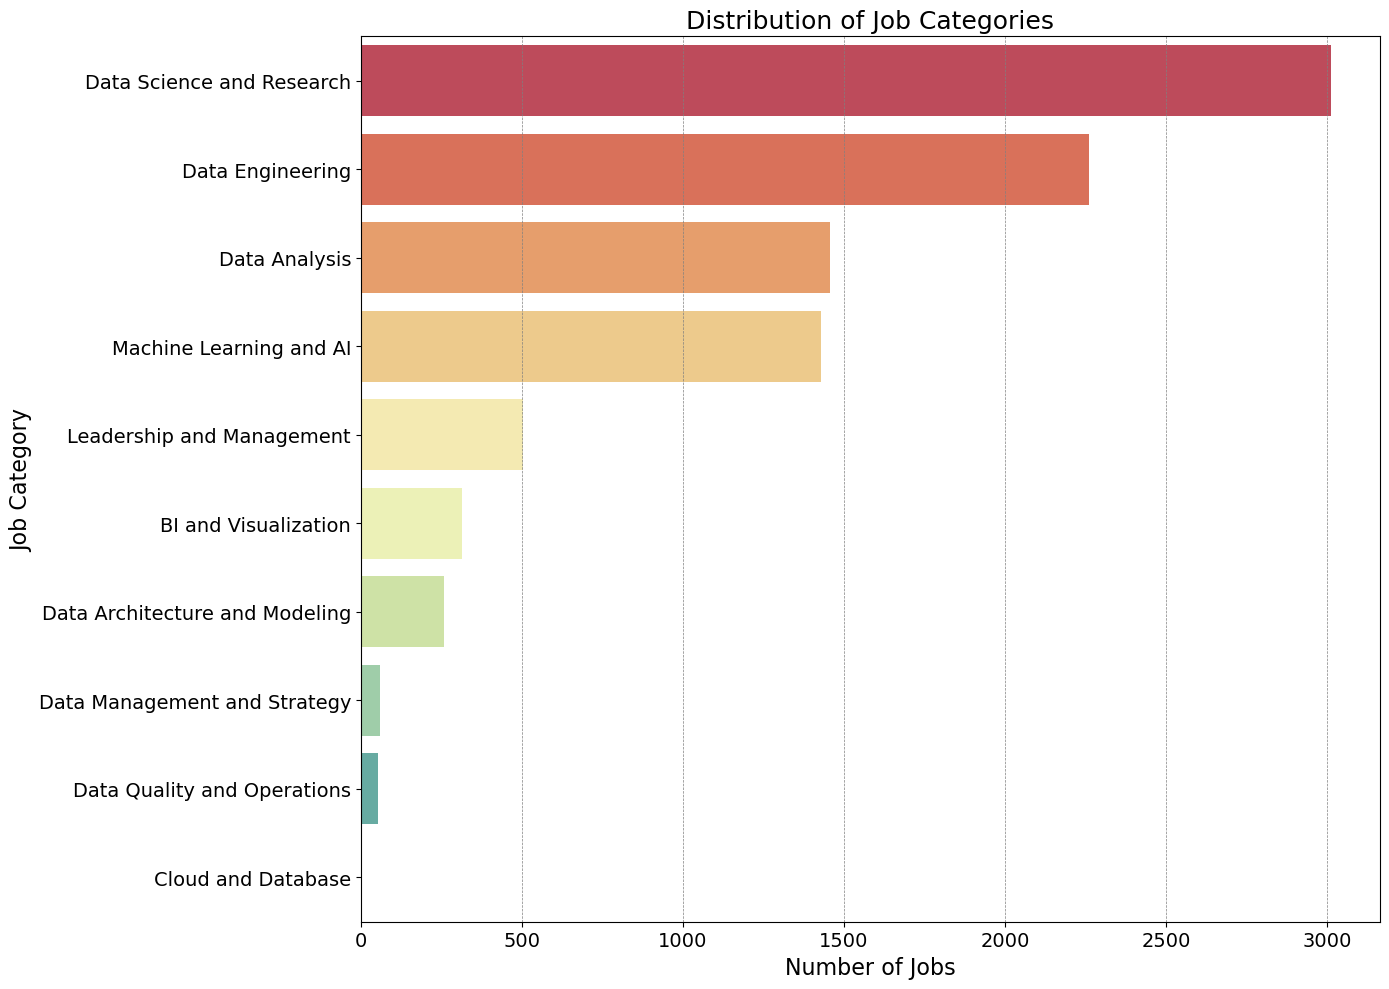

In [12]:
plot_job_category_distribution(data)

# Statistical Graph Function

In [13]:
def plot_salary_distribution_by_company_size(data):
    """
    Generates a box plot showing the distribution of salaries in USD across different company sizes.

    Parameters:
    - data: DataFrame containing job data with 'company_size' and 'salary_in_usd' columns.

    The function creates a box plot with company size on the x-axis and salary in USD on the y-axis.
    Company sizes are categorized as 'S' (Small), 'M' (Medium), and 'L' (Large) and are ordered accordingly.
    Enhancements include an adjusted figure size and improved font sizes for better readability.
    """
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='company_size', y='salary_in_usd', data=data, order=['S', 'M', 'L'], palette='coolwarm')
    plt.title('Salary Distribution by Company Size', fontsize=18)
    plt.xlabel('Company Size', fontsize=16)
    plt.ylabel('Salary in USD', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
    plt.tight_layout()
    plt.show()
    return

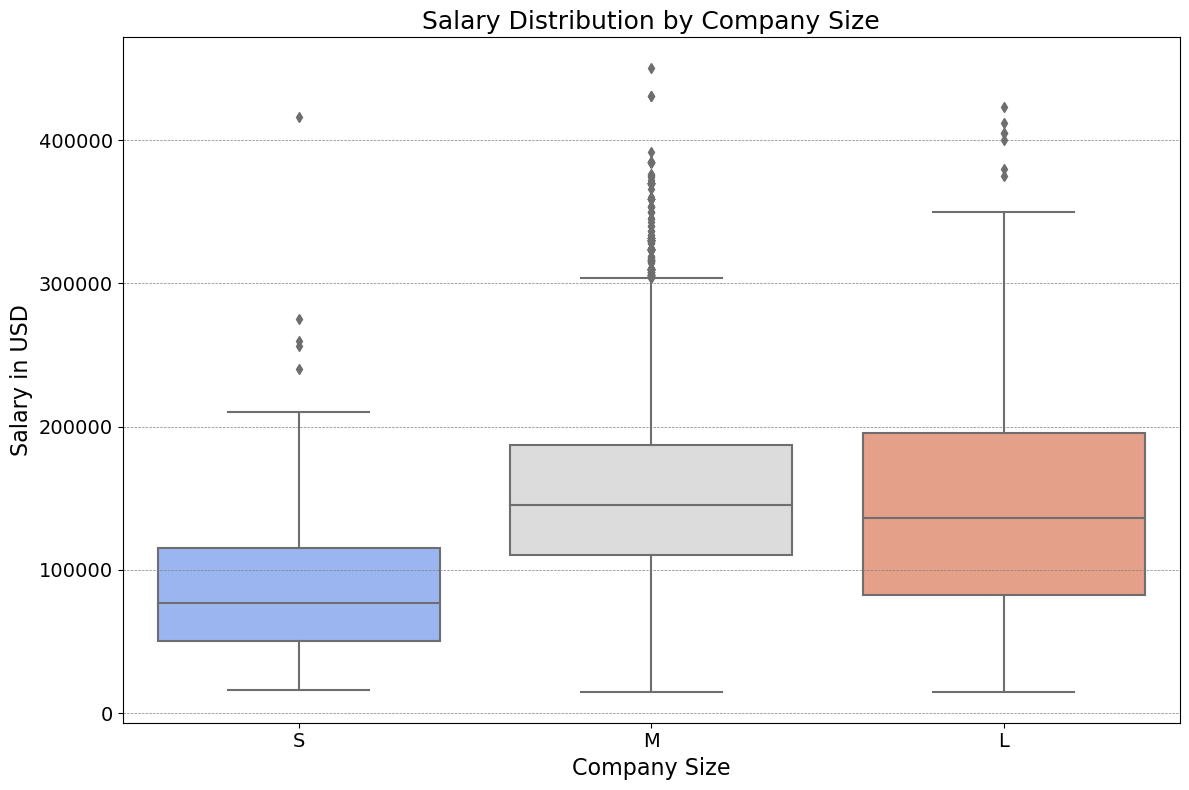

In [14]:
plot_salary_distribution_by_company_size(data)

# EXTRA EDA

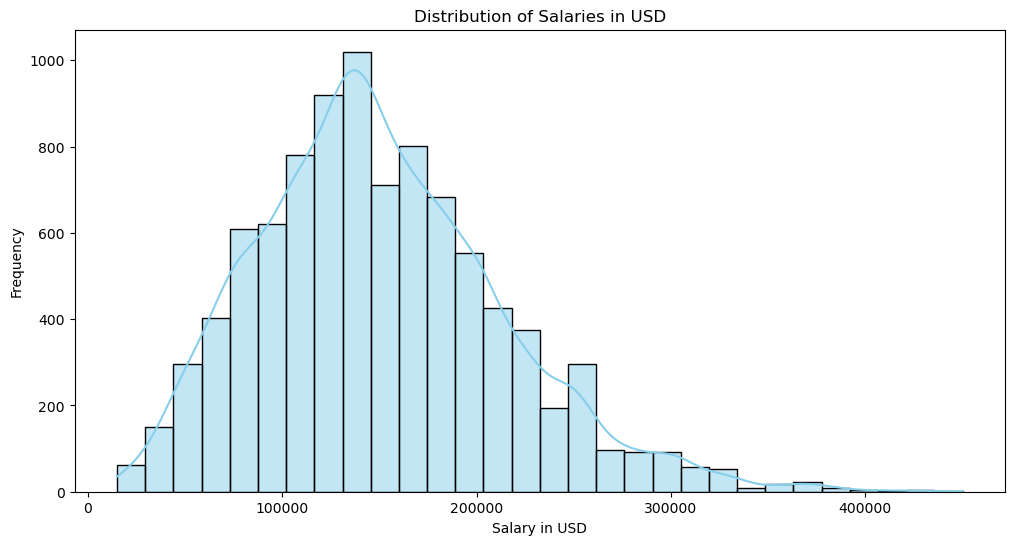

In [15]:
# Distribution of salaries in USD
plt.figure(figsize=(12, 6))
sns.histplot(data['salary_in_usd'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


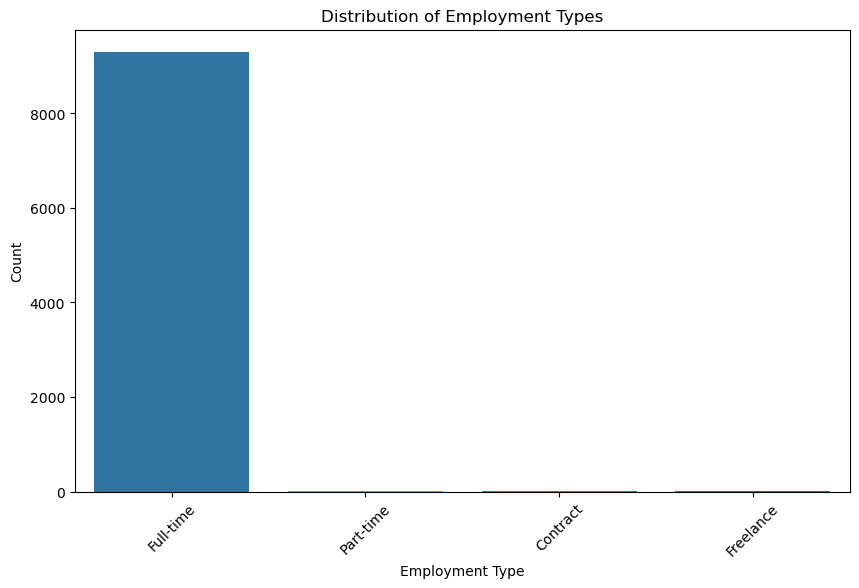

In [16]:
# Distribution of Employment Types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='employment_type')
plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


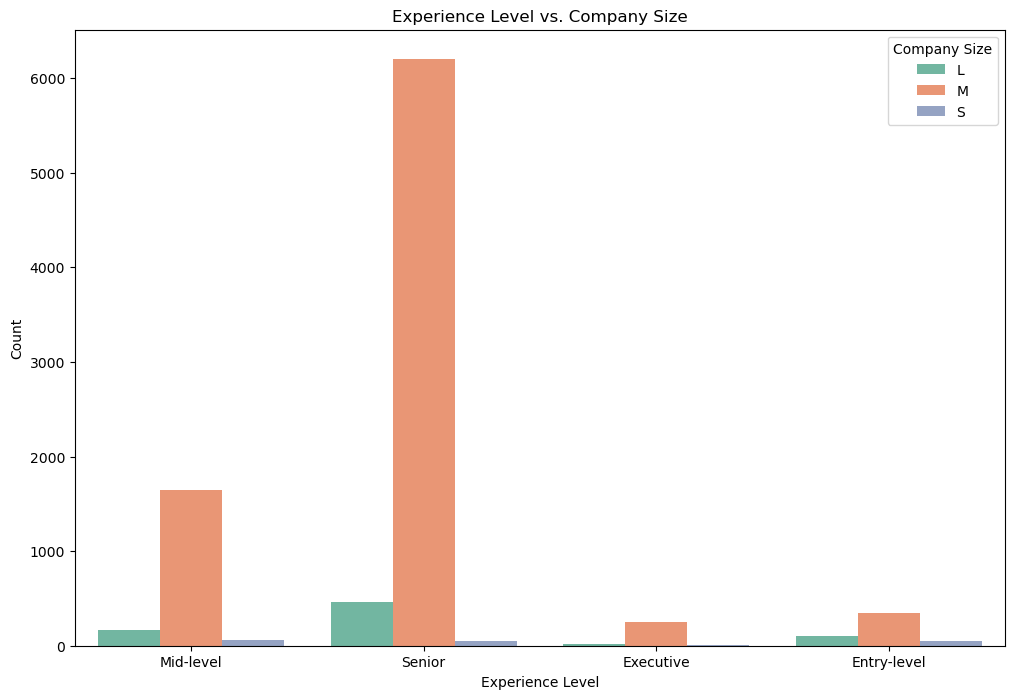

In [17]:
# Experience Level vs. Company Size
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='experience_level', hue='company_size', palette='Set2')
plt.title('Experience Level vs. Company Size')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.legend(title='Company Size')
plt.show()


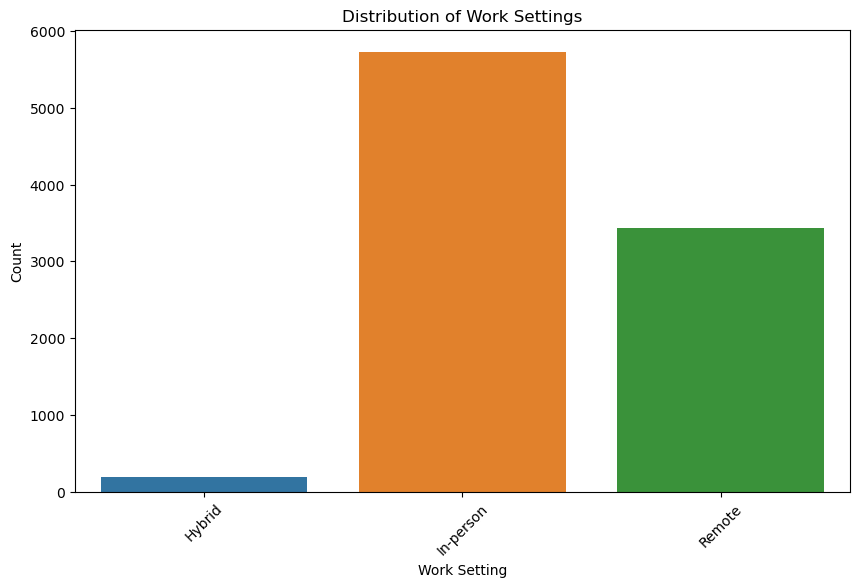

In [18]:
# Distribution of Work Settings
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='work_setting')
plt.title('Distribution of Work Settings')
plt.xlabel('Work Setting')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


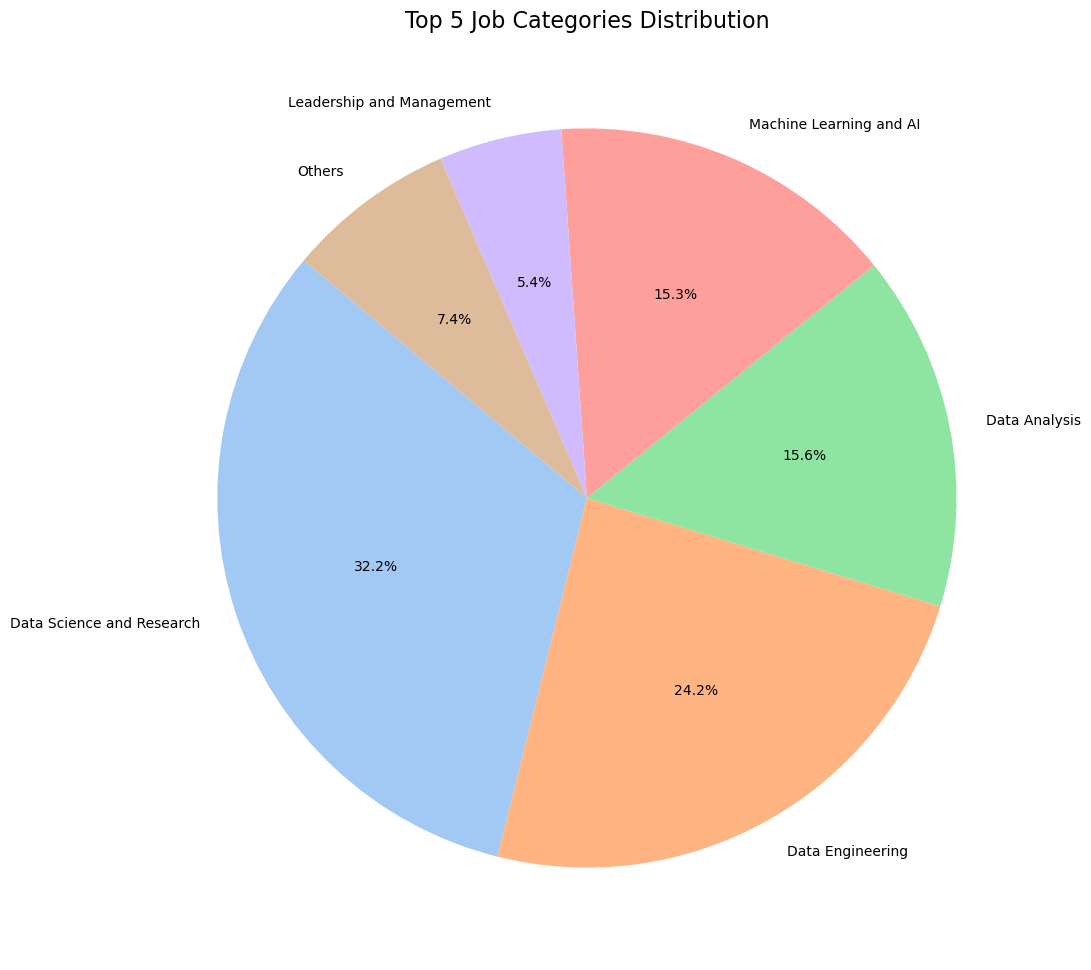

In [19]:
# Count jobs in each category
job_category_counts = data['job_category'].value_counts()

# Selecting the top 5 job categories and summing the rest into an 'Others' category
top_categories = job_category_counts[:5]  # Top 5 categories
others = job_category_counts[5:].sum()  # Sum of all other categories
top_categories['Others'] = others  # Adding 'Others' category

# Creating the adjusted pie chart
plt.figure(figsize=(12, 12))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(top_categories)))
plt.title('Top 5 Job Categories Distribution', fontsize=16)
plt.show()
